# ONE - WAY ANOVA

One-way ANOVA (Analysis of Variance) is a statistical technique used to compare means of three or more groups to determine if there are statistically significant differences between them. It's called "one-way" because there is only one independent variable, which has multiple levels or groups. The term "ANOVA" reflects its capability to analyze the variance among group means.

### Question 1 :

A researcher conducted a study to investigate the effectiveness of four different teaching methods (A, B, C, and D) on student performance in a particular subject. The researcher randomly assigned students to four groups and implemented each teaching method with a group of students. At the end of the study, the researcher collected test scores from each group. The following are the test scores obtained by students in each group:

<br>

Teaching Method A (ACatScores1): [8, 10, 12, 8, 7]

Teaching Method B (BCatScores2): [12, 11, 9, 14, 4]

Teaching Method C (CCatScores3): [18, 12, 16, 6, 8]

Teaching Method D (DCatScores4): [13, 9, 12, 16, 15]

<br>
Using the provided data, perform a one-way analysis of variance (ANOVA) to determine if there are any statistically significant differences in the mean test scores among the four teaching methods. State the null hypothesis, alternative hypothesis, calculate the F-statistic, and make a conclusion based on the obtained result.

In [60]:
import math
import pandas as pd

#Preparing the data:
ACatScores1 = [8,10,12,8,7]
BCatScores2 = [12,11,9,14,4]
CCatScores3 = [18,12,16,6,8]
DCatScores4 = [13,9,12,16,15]

headers = ["A","B","C","D"]


scores1 = list(ACatScores1)
scores2 = list(BCatScores2)
scores3 = list(CCatScores3)
scores4 = list(DCatScores4)

scores = [scores1, scores2, scores3,scores4]

print(scores)
print(" ---------------------------------- ")
print(pd.DataFrame(scores,headers).T)

[[8, 10, 12, 8, 7], [12, 11, 9, 14, 4], [18, 12, 16, 6, 8], [13, 9, 12, 16, 15]]
 ---------------------------------- 
    A   B   C   D
0   8  12  18  13
1  10  11  12   9
2  12   9  16  12
3   8  14   6  16
4   7   4   8  15


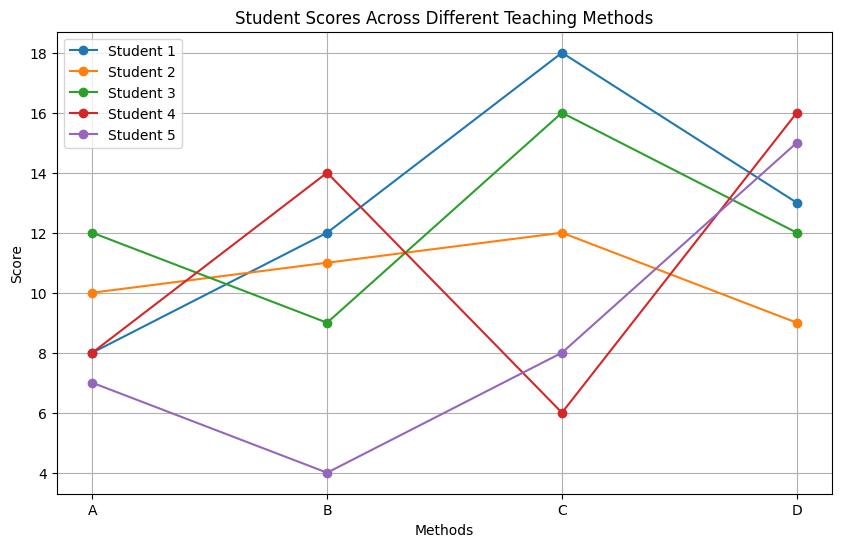

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Transpose the scores matrix to have students on the x-axis and subjects on the y-axis
scores_transposed = np.array(scores).T

# Plotting each student's scores across different teaching methods
plt.figure(figsize=(10, 6))

for i in range(len(scores_transposed)):
    plt.plot(range(1, len(headers) + 1), scores_transposed[i], marker='o', label=f'Student {i+1}')

plt.title('Student Scores Across Different Teaching Methods')
plt.xlabel('Methods')
plt.ylabel('Score')
plt.xticks(range(1, len(headers) + 1), headers)  # Set x-ticks as teaching methods
plt.legend()
plt.grid(True)
plt.show()


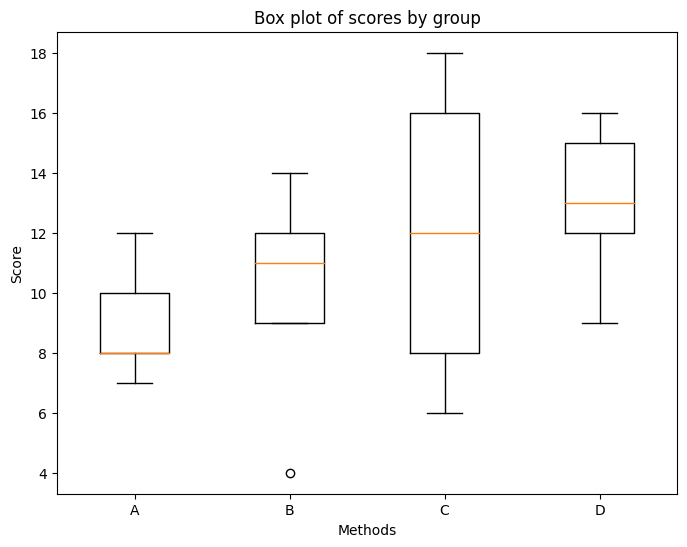

In [62]:
# Visualizing box plots to compare distributions between groups
plt.figure(figsize=(8, 6))
plt.boxplot(scores, labels=headers)
plt.title('Box plot of scores by group')
plt.xlabel('Methods')
plt.ylabel('Score')
plt.show()

### Question 2 :

A pharmaceutical company conducted a study to compare the effectiveness of three different dosages (0 mg, 50 mg, and 100 mg) of a new medicine in reducing pain levels for patients with a certain condition. Patients were randomly assigned to one of the three dosage groups, and their pain levels were measured after taking the medicine. The following table shows the pain level scores obtained for each dosage group:
Dosage (mg)	0 mg	50 mg	100 mg
<br>


| Dosage (mg) | 0 mg | 50 mg | 100 mg |
|-------------|------|-------|--------|
| Patient 1   | 9    | 7     | 4      |
| Patient 2   | 8    | 6     | 3      |
| Patient 3   | 7    | 6     | 2      |
| Patient 4   | 8    | 7     | 3      |
| Patient 5   | 8    | 8     | 4      |
| Patient 6   | 9    | 7     | 3      |
| Patient 7   | 8    | 6     | 2      |

<br>
Perform a one-way analysis of variance (ANOVA) to determine if there are any statistically significant differences in the mean pain levels among the three dosage groups. State the null hypothesis, alternative hypothesis, calculate the F-statistic, and make a conclusion based on the obtained result.

In [37]:
import math
import pandas as pd

mg0 = [9,8,7,8,8,9,8]
mg50 = [7,6,6,7,8,7,6]
mg100 = [4,3,2,3,4,3,2]

headers = ["0mg","50mg","100mg"]

s1 = list(mg0)
s2 = list(mg50)
s3 = list(mg100)

scores = [s1,s2,s3]
print(scores)
print(" ---------------------------------- ")
print(pd.DataFrame(scores,headers).T)

[[9, 8, 7, 8, 8, 9, 8], [7, 6, 6, 7, 8, 7, 6], [4, 3, 2, 3, 4, 3, 2]]
 ---------------------------------- 
   0mg  50mg  100mg
0    9     7      4
1    8     6      3
2    7     6      2
3    8     7      3
4    8     8      4
5    9     7      3
6    8     6      2


### Mathematical Step by Step Calculation of One-Way Anova:

(Once you have taken your data in 'scores')

In [63]:
k = len(scores)                       #Value that stores the number of groups present
k

4

In [64]:
ns = []    #List to store the number of values present in one category
sums = []  #List to store the total sum of all values present in each category

for i in scores:
    ns.append(len(i))
    sums.append(sum(i))

ns, sums

([5, 5, 5, 5], [45, 50, 60, 65])

In [65]:
means = []      #List to store the mean of each individual category

for i in range(k):
    means.append(sums[i]/ns[i])

means

[9.0, 10.0, 12.0, 13.0]

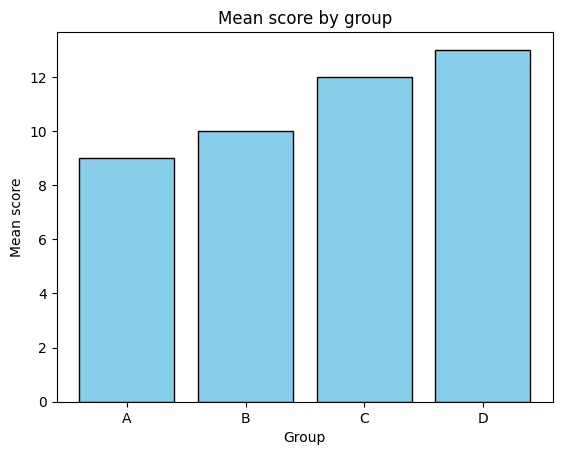

In [66]:
# Visualizing bar plot of means by group
means = [sum(group) / len(group) for group in scores]
plt.bar(headers, means, color='skyblue', edgecolor='black')
plt.title('Mean score by group')
plt.xlabel('Group')
plt.ylabel('Mean score')
plt.show()

the sum of squares within (or SSerror) , which has the scary formula of:

\begin{equation*}
SS_w = \sum_{i=1}^{k} \sum_{j=1}^{n_i} \left( x_{i,j} - \bar{x}_i \right)^2
\end{equation*}


In [67]:
SSw = 0

for i in range(k):
    for j in range(ns[i]):
        SSw = SSw + (scores[i][j] - means[i])**2

SSw

208.0

In [68]:
nTot = sum(ns)               #Variable to store the total no. of scores present in dataframe
sumTot = sum(sums)           #Variable to store the total sum of all the scores
meanTot = sumTot / nTot      #Variable to store the mean of all the scores

nTot, sumTot, meanTot

(20, 220, 11.0)

SSt (total sum of squares):
\begin{equation*}
SS_t = \sum_{i=1}^{k} \sum_{j=1}^{n_i} \left( x_{i,j} - \bar{x} \right)^2
\end{equation*}


In [69]:
SSt = 0


for i in range(k):
  for j in range(ns[i]):
    SSt = SSt + (scores[i][j] - meanTot)**2
SSt

258.0

the sum of squares between using (or SSexplained):

\begin{equation*}
SS_b = \sum_{i=1}^{k} n_i \times \left( \bar{x}_i - \bar{x} \right)^2
\end{equation*}

or simply, SSt - SSw = SSb

In [70]:
SSb = 0
for i in range(k):
    SSb = SSb + ns[i] * (means[i] - meanTot)**2


print(SSt - SSw)

SSb

50.0


50.0

In [71]:
dfb = k - 1     # Degrees of Freedom Between : measures the number of independent comparisons that can be made among the group means
dfw = nTot - k  # Degrees of Freedom Within : measures the amount of variability remaining after accounting for differences between group means

dfb, dfw

(3, 16)

mean square within is then defined as:

\begin{equation*}
µS_w = \frac{SS_w}{df_w}
\end{equation*}

<br>
 provides an estimate of the variance of the population from which the samples are drawn

In [72]:
MSw = SSw / dfw
MSw

13.0

mean square between is then defined as:

\begin{equation*}
µS_b = \frac{SS_b}{df_b}
\end{equation*}

<br>
provides an estimate of the variance between the group means, indicating the extent to which the group means differ from each other


In [73]:
MSb = SSb / dfb
MSb

16.666666666666668

In [74]:
F = MSb / MSw
F   #Calculated F score

1.2820512820512822

In [75]:
import scipy.stats

scipy.stats.f.ppf() is a function from the SciPy library's stats module used to compute the percent point function (inverse of the cumulative distribution function) of the F-distribution.

### F- Table:



| dfb/dfw | 1     | 2     | 3     | 4     | 5     | 6     | 7     | 8     | 9     | 10    | 20    | 30    | 40    | 50    | 100   |
|---------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|
| 1       | 161.4 | 199.5 | 215.7 | 224.6 | 230.2 | 233.9 | 236.8 | 238.9 | 240.4 | 241.5 | 254.3 | 257.3 | 259.4 | 260.9 | 265.7 |
| 2       | 18.5  | 19.0  | 19.2  | 19.3  | 19.3  | 19.4  | 19.4  | 19.5  | 19.5  | 19.6  | 19.8  | 19.8  | 19.9  | 19.9  | 20.1  |
| 3       | 10.1  | 9.6   | 9.3   | 9.1   | 9.0   | 8.9   | 8.8   | 8.7   | 8.6   | 8.6   | 8.3   | 8.2   | 8.1   | 8.0   | 7.7   |
| 4       | 7.7   | 6.9   | 6.6   | 6.4   | 6.3   | 6.2   | 6.1   | 6.0   | 5.9   | 5.8   | 5.4   | 5.2   | 5.1   | 5.0   | 4.6   |
| 5       | 6.6   | 5.8   | 5.4   | 5.2   | 5.1   | 5.0   | 4.9   | 4.8   | 4.7   | 4.6   | 4.2   | 4.0   | 3.9   | 3.8   | 3.3   |
| 6       | 6.0   | 5.1   | 4.8   | 4.5   | 4.4   | 4.3   | 4.2   | 4.1   | 4.0   | 3.9   | 3.4   | 3.2   | 3.1   | 3.0   | 2.5   |
| 7       | 5.5   | 4.7   | 4.3   | 4.0   | 3.9   | 3.8   | 3.7   | 3.6   | 3.5   | 3.4   | 2.9   | 2.7   | 2.6   | 2.5   | 1.9   |
| 8       | 5.3   | 4.5   | 4.1   | 3.8   | 3.7   | 3.6   | 3.5   | 3.4   | 3.3   | 3.2   | 2.7   | 2.5   | 2.4   | 2.3   | 1.7   |
| 9       | 5.1   | 4.3   | 3.9   | 3.6   | 3.5   | 3.4   | 3.3   | 3.2   | 3.1   | 3.0   | 2.5   | 2.3   | 2.2   | 2.1   | 1.5   |
| 10      | 5.0   | 4.1   | 3.7   | 3.5   | 3.3   | 3.2   | 3.1   | 3.0   | 2.9   | 2.8   | 2.3   | 2.1   | 2.0   | 1.9   | 1.3   |

<br>
The F-table, also known as the F-distribution table, is a statistical reference table used in hypothesis testing, specifically in the context of analysis of variance (ANOVA) and regression analysis. The F-table provides critical values of the F-statistic for different levels of significance and degrees of freedom.


In [76]:
alpha = 1-.05  #represents the significance level

f_crit = scipy.stats.f.ppf(alpha,dfb,dfw)

f_crit

3.238871517453585

In [77]:
if F < f_crit:
  print("Failed to reject H0")
else:
  print("H0 is rejected")

Failed to reject H0


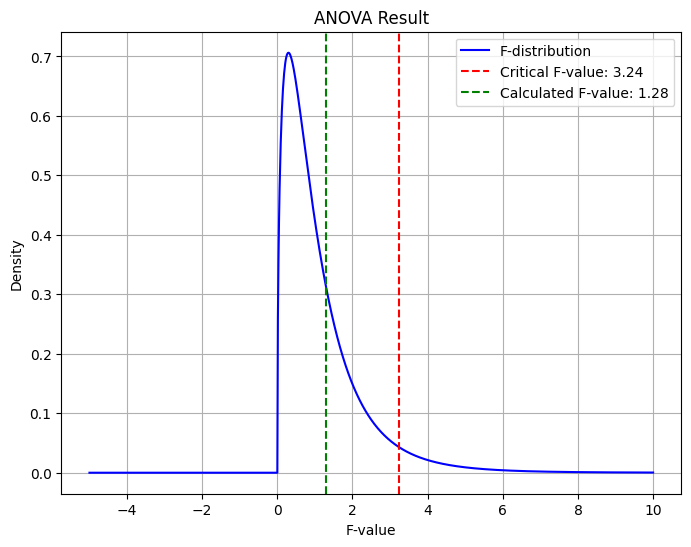

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Define the x range for the F-distribution curve
x = np.linspace(-5, 10, 1000)

# Calculate the F-distribution curve
f_distribution = stats.f.pdf(x, dfb, dfw)

# Plot the F-distribution curve
plt.figure(figsize=(8, 6))
plt.plot(x, f_distribution, 'b-', label='F-distribution')

# Plot the critical F-value
plt.axvline(x=f_crit, color='red', linestyle='--', label=f'Critical F-value: {f_crit:.2f}')

# Plot the calculated F-value
plt.axvline(x=F, color='green', linestyle='--', label=f'Calculated F-value: {F:.2f}')

plt.title('ANOVA Result')
plt.xlabel('F-value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
from scipy.stats import f_oneway
f_oneway(mg0, mg50, mg100)                                                      #USING PREDEFINED FUNCTION IN SCIPY

F_onewayResult(statistic=86.3333333333334, pvalue=5.956341358737431e-10)

In [22]:
from scipy.stats import f_oneway
f_oneway(ACatScores1, BCatScores2, CCatScores3, DCatScores4)                    #USING PREDEFINED FUNCTION IN SCIPY

F_onewayResult(statistic=1.2820512820512822, pvalue=0.3143594700488932)

In [ ]:
from scipy.stats import f

f.sf(F, dfb, dfw) #returns the p value for the given F value and dfb,dfw

0.3143594700488932